In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator

In [2]:
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=22)

In [3]:
reference = np.loadtxt('Day 1/Tube/He with calibration.txt', dtype=np.str, skiprows=14)
reference = np.char.replace(reference, ',', '.').astype(np.float64)

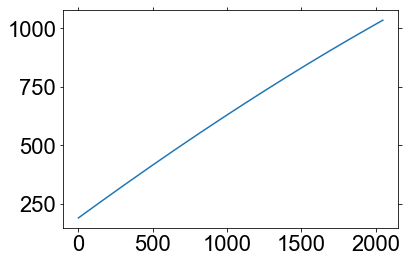

In [4]:
plt.plot(reference[:,0])

In [5]:
heights = {
    'H2' : 0.2,
    'Ar' : 0.4,
    'He' : 0.2,
    'Ne' : 0.6,
    'Hg' : 0.5
}
spectral_lines = {
    'H2' : [486, 656],
    'Ar' : [347, 358, 751, 763, 811],
    'He' : [388, 447, 501, 587, 667, 706],
    'Ne' : [640],
    'Hg' : [365, 435, 546]
}
relative_intensity = {
    'He' : np.array([500, 200, 100, 500, 100, 200])
}
for i in relative_intensity.keys():
    relative_intensity[i] = relative_intensity[i]/np.max(relative_intensity[i])

In [6]:
tube = 'Hg'
data = np.loadtxt('Day 1/Tube/'+tube+'.txt', dtype=np.str, skiprows=14)
data = np.char.replace(data, ',', '.').astype(np.float64)
data_bkg = np.loadtxt('Day 1/Tube/Background - '+tube+'.txt', dtype=np.str, skiprows=14)
data_bkg = np.char.replace(data_bkg, ',', '.').astype(np.float64)
data[:,1] = data[:,1]-data_bkg[:,1]
data[:,1] /= np.max(data[:,1])

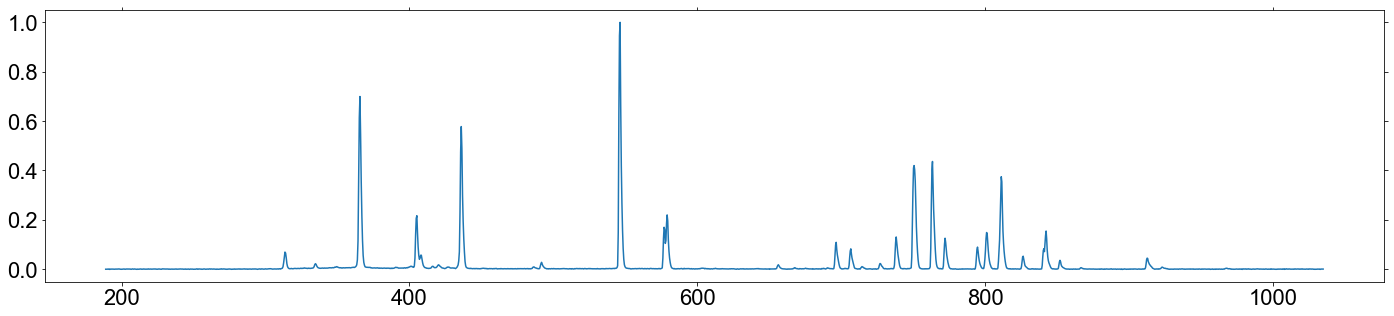

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(24, 5)
ax.plot(reference[:,0], data[:,1])

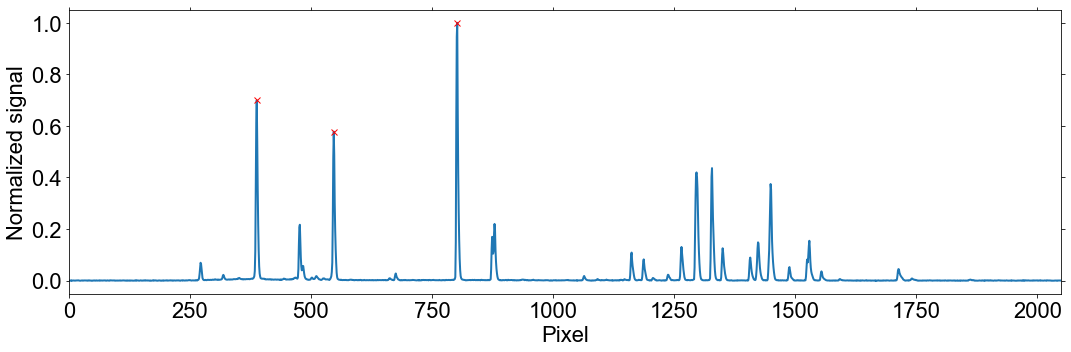

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 5)
peaks = find_peaks(data[:,1], height=heights[tube])[0]
ax.plot(data[:,0], data[:,1], lw=2)
ax.plot(data[peaks,0], data[peaks,1], 'rx')
ax.set_xlim(0, 2048)
ax.set_xlabel('Pixel')
ax.set_ylabel('Normalized signal')
plt.tight_layout()
# plt.savefig('Hg raw_v2.pdf')

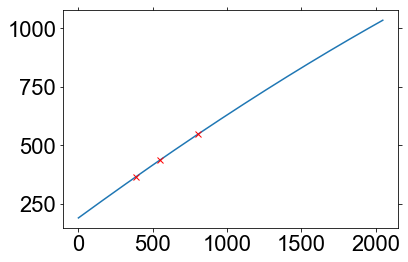

In [12]:
plt.plot(reference[:,0])
plt.plot(peaks, spectral_lines[tube], 'rx')

In [13]:
tubes = ['H2', 'He', 'Ne', 'Hg', 'Ar']
pixels = np.array([])
wavelengths = np.array([])
for t in tubes:
    data = np.loadtxt('Day 1/Tube/'+t+'.txt', dtype=np.str, skiprows=14)
    data = np.char.replace(data, ',', '.').astype(np.float64)
    data_bkg = np.loadtxt('Day 1/Tube/Background - '+t+'.txt', dtype=np.str, skiprows=14)
    data_bkg = np.char.replace(data_bkg, ',', '.').astype(np.float64)
    data[:,1] = data[:,1]-data_bkg[:,1]
    data[:,1] /= np.max(data[:,1])
    peaks = find_peaks(data[:,1], height=heights[t])[0]
    pixels = np.append(pixels, peaks)
    wavelengths = np.append(wavelengths, spectral_lines[t])

In [41]:
def cal(x, *params):
    A,B,C = params
    return A + B*x + C*x*x
def cal2(x, *params):
    A,B,C,D = params
    return A + B*x + C*x*x + D*x*x*x

In [43]:
popt, pcov = curve_fit(cal, pixels, wavelengths, p0=(200, 1, 0), sigma=np.ones(np.shape(wavelengths)), absolute_sigma=True)
popt2, pcov2 = curve_fit(cal2, pixels, wavelengths, p0=(200, 1, 0, 0), sigma=np.ones(np.shape(wavelengths)), absolute_sigma=True)

In [56]:
popt, np.sqrt(np.diag(pcov))

(array([ 1.95949540e+02,  4.48605399e-01, -1.60299572e-05]),
 array([1.54678448e+00, 4.04879648e-03, 2.32391564e-06]))

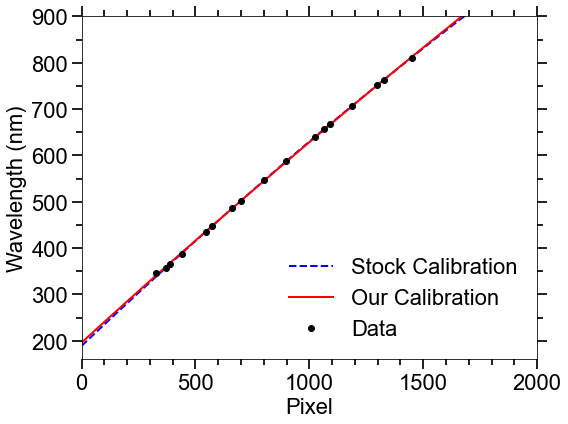

In [55]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 6)

ax.plot(reference[:,0], 'b--', label='Stock Calibration', lw=2)

xs = np.linspace(0, 2000)
ax.plot(xs, cal(xs, *popt), 'r', label='Our Calibration', lw=2)

ax.plot(pixels, wavelengths, 'k.', label='Data', ms=12)

ax.legend(frameon=False)
ax.set_xlim((0, 2000))
ax.set_ylim((160, 900))
ax.set_xlabel('Pixel')
ax.set_ylabel('Wavelength (nm)')
plt.tick_params(which='major', axis='both', length=10, width=1.7)
plt.tick_params(which='minor', axis='both', length=6, width=1.7)
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.xaxis.set_major_locator(MultipleLocator(500))
plt.tight_layout()
# plt.savefig('cal.pdf')

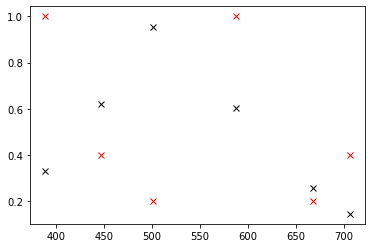

In [107]:
hs = data[peaks, 1]
plt.plot(reference[peaks,0], relative_intensity[tube], 'rx')
plt.plot(reference[peaks,0], hs, 'kx')

In [21]:
data = np.loadtxt('Day 2/Sun/FLMS055071__0__14-14-25-784.txt', dtype=np.str, skiprows=14)
data = np.char.replace(data, ',', '.').astype(np.float64)
data[:,1] /= np.max(data[:,1])

In [22]:
def planck(x, *params):
    A, B = params
    return A*x**(-5)/(np.exp(B/x)-1)

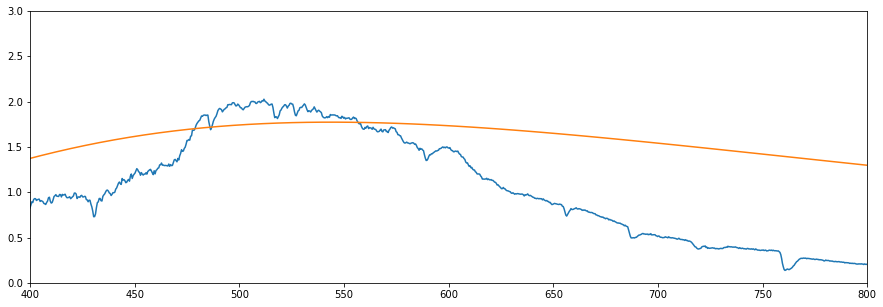

In [31]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 5)

ax.plot(data[:,0], data[:,1]/(CCD(data[:,0])))

ax.set_ylim((0,3))
ax.set_xlim((400,800))

ls = np.linspace(200, 900, 100)
plt.plot(ls, 4*planck(ls, 3e15, 2700))

ipykernel_launcher:3: RuntimeWarning: overflow encountered in exp


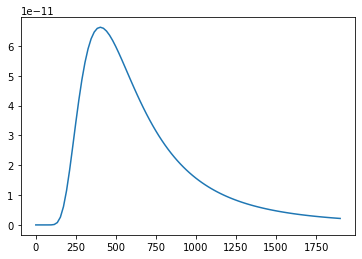

In [98]:
ls = np.linspace(0.1, 1900, 100)
plt.plot(ls, planck(ls, 100000, 2000))


In [18]:
def CCD(x):
    l = x-400
    return 1-x/1000

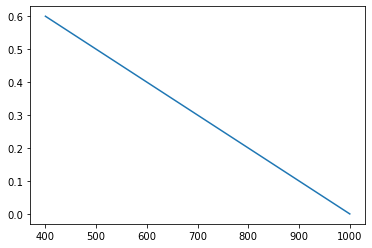

In [19]:
ls = np.linspace(400, 1000, 100)
plt.plot(ls, CCD(ls))